In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset
df = pd.read_csv('dementia_dataset.csv')

In [5]:
# Eliminar filas con NaN en columnas importantes
df.dropna(subset=['Age', 'M/F', 'Hand'] + ['SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], inplace=True)

# Filtrar visitas únicas
df_unique_visits = df.drop_duplicates(subset='MRI ID')

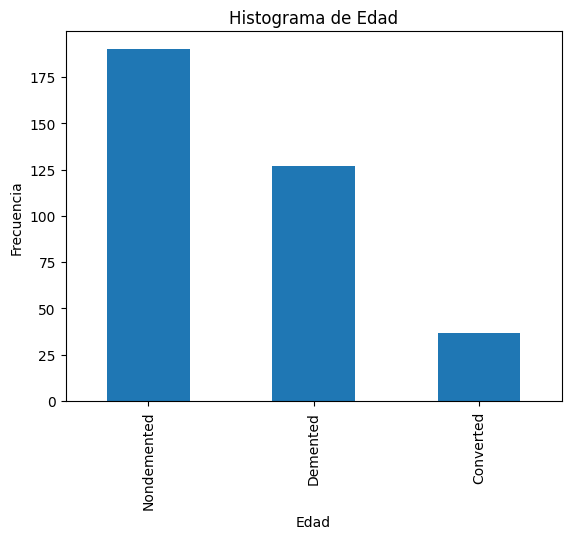

In [6]:
import matplotlib.pyplot as plt

# Distribución de grupos
df['Group'].value_counts().plot(kind='bar')

# Histograma de edad
plt.hist(df['Age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

In [7]:
X = df.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Group'], axis=1)
y = df['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax') # 3 clases: Demented, Nondemented, Converted
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

ValueError: could not convert string to float: 'F'